In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('dataset.csv')
df.head()

,id,year,product_name,company,country,industry_group,weight_kg,carbon_footprint_pcf,upstream_percent_total_pcf,operations_percent_total_pcf,downstream_percent_total_pcf
0,10056-1-2014,2014,Frosted Flakes(R) Cereal,Kellogg Company,USA,"""Food, Beverage & Tobacco""",0.7485,2.00,57.50%,30.00%,12.50%
1,10056-1-2015,2015,"""Frosted Flakes, 23 oz, produced in Lancaster,...",Kellogg Company,USA,Food & Beverage Processing,0.7485,2.00,57.50%,30.00%,12.50%
2,10222-1-2013,2013,Office Chair,KNOLL INC,USA,Capital Goods,20.6800,72.54,80.63%,17.36%,2.01%
3,10261-1-2017,2017,Multifunction Printers,"""Konica Minolta, Inc.""",Japan,Technology Hardware & Equipment,110.0000,1488.00,30.65%,5.51%,63.84%
4,10261-2-2017,2017,Multifunction Printers,"""Konica Minolta, Inc.""",Japan,Technology Hardware & Equipment,110.0000,1818.00,25.08%,4.51%,70.41%


In [19]:
df['country'].unique()

array(['USA', 'Japan', 'France', 'South Korea', 'Switzerland',
       'United Kingdom', 'Brazil', 'Taiwan', 'Spain', 'Finland', 'China',
       'Canada', 'South Africa', 'Ireland', 'Belgium', 'India', 'Sweden',
       'Germany', 'Australia', 'Chile', 'Lithuania', 'Italy',
       'Netherlands', 'Colombia', 'Indonesia', 'Malaysia', 'Greece',
       'Luxembourg'], dtype=object)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            866 non-null    object 
 1   year                          866 non-null    int64  
 2   product_name                  866 non-null    object 
 3   company                       866 non-null    object 
 4   country                       866 non-null    object 
 5   industry_group                866 non-null    object 
 6   weight_kg                     866 non-null    float64
 7   carbon_footprint_pcf          866 non-null    float64
 8   upstream_percent_total_pcf    866 non-null    object 
 9   operations_percent_total_pcf  866 non-null    object 
 10  downstream_percent_total_pcf  866 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 74.6+ KB


In [3]:
df.describe()

,year,weight_kg,carbon_footprint_pcf
count,866.000000,866.000000,8.660000e+02
mean,2014.762125,2806.548993,1.581525e+04
std,1.236720,34405.725655,1.813733e+05
min,2013.000000,0.001270,4.000000e-04
25%,2014.000000,1.000000,7.000000e+00
50%,2015.000000,15.899207,1.111000e+02
75%,2016.000000,1000.000000,1.600000e+03
max,2017.000000,600000.000000,3.718044e+06


In [4]:
print(df.isna().sum())

id                              0
year                            0
product_name                    0
company                         0
country                         0
industry_group                  0
weight_kg                       0
carbon_footprint_pcf            0
upstream_percent_total_pcf      0
operations_percent_total_pcf    0
downstream_percent_total_pcf    0
dtype: int64


In [5]:

# Step 2: Filter the DataFrame to include only rows with the maximum year
max_year = df['year'].max()
filtered_data = df[df['year'] == max_year]

# Step 3: Group the DataFrame by 'industry_group'
grouped_data = filtered_data.groupby('industry_group').agg(
    num_companies=('company', 'nunique'),
    total_industry_footprint=('carbon_footprint_pcf', 'sum')
)

# Step 4: Round the 'total_industry_footprint' values
grouped_data['total_industry_footprint'] = grouped_data['total_industry_footprint'].round(1)

# Step 5: Sort the results by 'total_industry_footprint' in descending order
result = grouped_data.sort_values(by='total_industry_footprint', ascending=False).reset_index()

# Display the result
print(result)


                       industry_group  num_companies  total_industry_footprint
0                           Materials              3                  107129.0
1                       Capital Goods              2                   94942.7
2     Technology Hardware & Equipment              4                   21865.1
3          "Food, Beverage & Tobacco"              1                    3161.5
4  Commercial & Professional Services              1                     740.6
5                 Software & Services              1                     690.0


C:\Users\Rafael\AppData\Local\Temp\ipykernel_18472\880259626.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='industry_group', y='total_industry_footprint', data=result, ax=ax1, palette='viridis')
C:\Users\Rafael\AppData\Local\Temp\ipykernel_18472\880259626.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


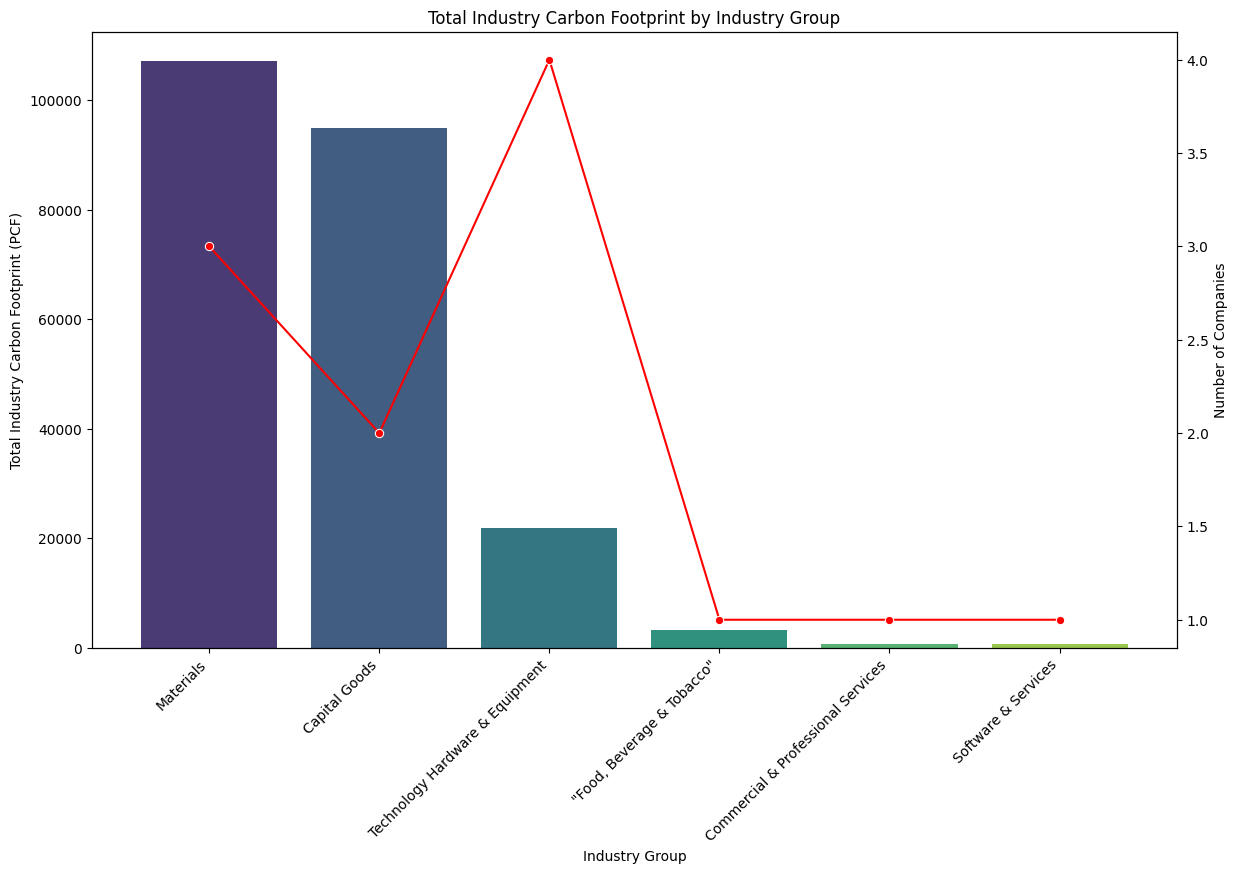

In [6]:

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create bar plot for total industry carbon footprint
sns.barplot(x='industry_group', y='total_industry_footprint', data=result, ax=ax1, palette='viridis')
ax1.set_xlabel('Industry Group')
ax1.set_ylabel('Total Industry Carbon Footprint (PCF)')
ax1.set_title('Total Industry Carbon Footprint by Industry Group')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add a secondary y-axis for the number of companies
ax2 = ax1.twinx()
sns.lineplot(x='industry_group', y='num_companies', data=result, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Number of Companies')

# Show the plot
plt.show()

Among the industry groups analyzed, Materials and Capital Goods stand out with the highest total industry footprints despite having lesser of number of companies than the Technology Hardware & Equipment having thrice lesser to produce carbon industry footprint. This insights highlight significant environmental impacts across various sectors, driven by factors such as operational scale and industry specialization.

C:\Users\Rafael\AppData\Local\Temp\ipykernel_18472\4144366323.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


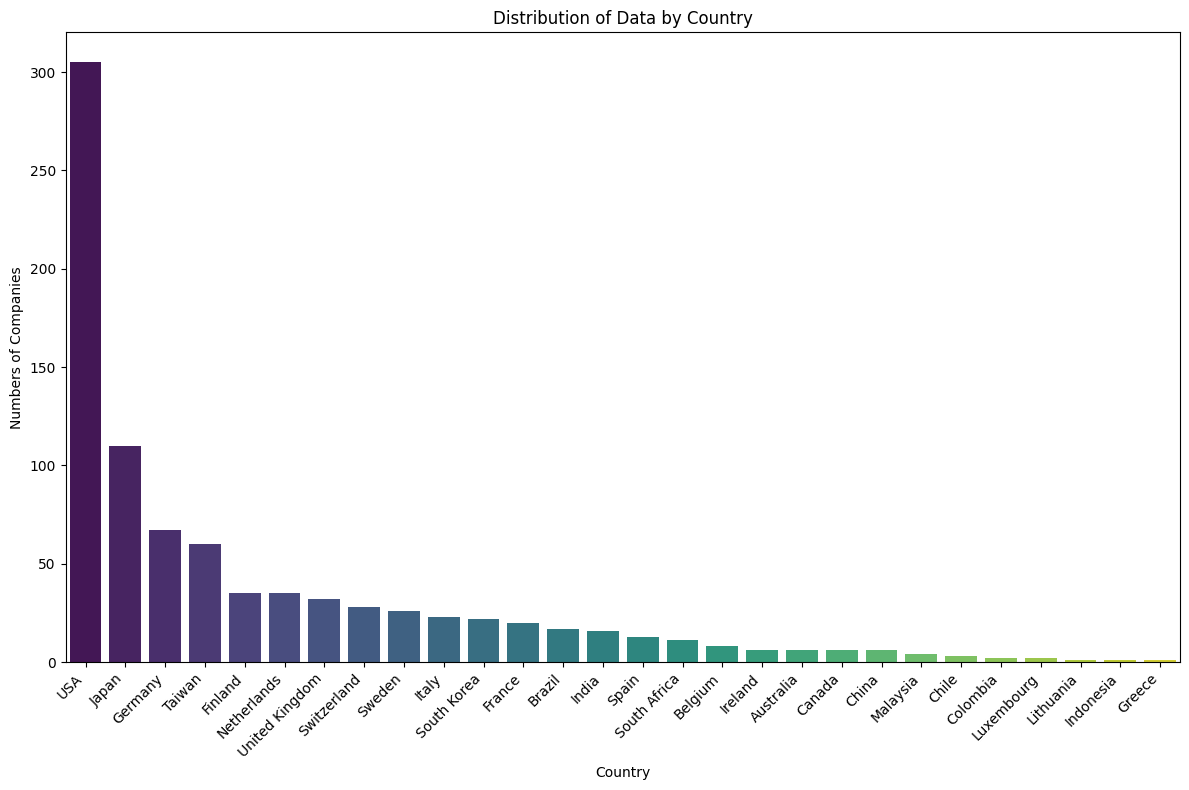

In [23]:

# Count occurrences of each country
country_counts = df['country'].value_counts()

# Plotting the data
plt.figure(figsize=(12, 8))

# Create bar plot for country distribution
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')

plt.xlabel('Country')
plt.ylabel('Numbers of Companies')
plt.title('Distribution of Data by Country')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

This bar chart will visualize the distribution of data across different countries in the dataset, helping us understand how the data is distributed geographically. Adjustments can be made based on specific data characteristics and visualization preferences.

C:\Users\Rafael\AppData\Local\Temp\ipykernel_18472\2130006506.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='carbon_footprint_pcf', data=country_footprint, palette='viridis')


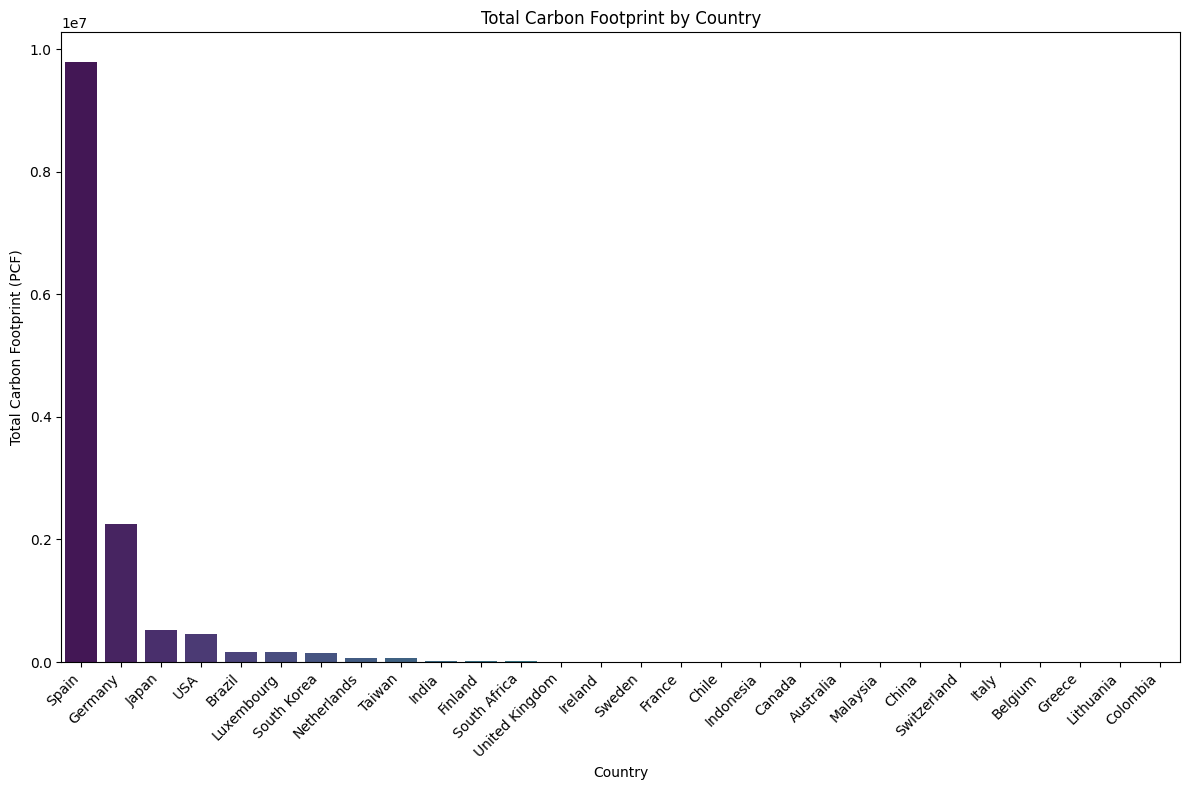

In [36]:

# Aggregate total carbon footprint by country
country_footprint = df.groupby('country')['carbon_footprint_pcf'].sum().reset_index()
country_footprint = country_footprint.sort_values(by='carbon_footprint_pcf', ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))

# Create bar plot for total carbon footprint by country
sns.barplot(x='country', y='carbon_footprint_pcf', data=country_footprint, palette='viridis')

plt.xlabel('Country')
plt.ylabel('Total Carbon Footprint (PCF)')
plt.title('Total Carbon Footprint by Country')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [29]:
group_df = df.groupby('country').agg(
    num_companies=('company', 'nunique'),
    total_industry_footprint=('carbon_footprint_pcf', 'sum')
)

group_df['total_industry_footprint'] = group_df['total_industry_footprint'].round(1)

result2 = group_df.sort_values(by='total_industry_footprint', ascending=False).reset_index()

print(result2)

           country  num_companies  total_industry_footprint
0            Spain              5                 9786126.2
1          Germany              5                 2251224.9
2            Japan             21                  519344.3
3              USA             39                  451869.2
4           Brazil              4                  167587.7
5       Luxembourg              1                  167007.3
6      South Korea              6                  140994.1
7      Netherlands              1                   70415.3
8           Taiwan             13                   61513.1
9            India              2                   24574.0
10         Finland              2                   21581.0
11    South Africa              3                   12310.9
12  United Kingdom              8                    6735.1
13         Ireland              1                    5130.0
14          Sweden              5                    4533.0
15          France              7       

As we can see about the dataset, the Spain produce the most high carbon footprint significantly not even the top 2 Germany get the half of its carbon footprint but thrice as much lesser than the Spain produce. Even the USA has the most has a lot of company with the count of 39, it isn't worst as the Spain does but still the USA is the 4th most high

## Conclusion

Based on the analysis of the total industry footprint by country, several key insights can be drawn:

1. High Impact Countries: Spain and Germany emerge as the countries with the highest total industry footprints, with 9,786,126.2 and 2,251,224.9 units respectively. This indicates a significant environmental impact driven by multiple companies operating within these nations.

2. Variability Across Nations: Countries like Japan, the USA, Brazil, and South Korea also show substantial footprints, reflecting diverse industrial activities and environmental practices across different regions.

3. Small but Significant Contributors: Luxembourg, Netherlands, Taiwan, and India demonstrate comparatively lower but noteworthy footprints, suggesting focused efforts might yield significant environmental improvements despite fewer companies.

4. Global Distribution: The presence of countries like South Africa, United Kingdom, Sweden, and France among others illustrates a global distribution of industrial footprints, emphasizing the need for international cooperation in environmental sustainability efforts.

5. Minimal Impact Countries: Countries such as Greece, Lithuania, and Colombia show minimal to negligible footprints. While these countries may have smaller industrial bases, efforts towards sustainability can still make meaningful contributions to global environmental goals.

6. Opportunities for Improvement: Identifying countries with higher footprints presents opportunities for targeted sustainability initiatives, potentially mitigating environmental impacts through regulatory frameworks, technological advancements, and industry best practices.

This analysis underscores the importance of understanding and addressing industrial footprints on a global scale, fostering collaboration between countries to achieve sustainable development goals and mitigate environmental degradation.